In [1]:
!git clone https://github.com/simon1938/Conway-s-Game-of-Life-Genetic-algorithms.git
%cd Conway-s-Game-of-Life-Genetic-algorithms

Cloning into 'Conway-s-Game-of-Life-Genetic-algorithms'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 98 (delta 37), reused 80 (delta 19), pack-reused 0 (from 0)
Receiving objects: 100% (98/98), 845.55 KiB | 5.95 MiB/s, done.
Resolving deltas: 100% (37/37), done.
/content/Conway-s-Game-of-Life-Genetic-algorithms


In [2]:
!python game_of_life.py train --cells 200 --training_attempts 150 --steps 60 --grid_file best_positions.json

pygame 2.6.1 (SDL 2.28.4, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
Starting training...
Initial cells: 200
Evolution steps: 60
Generating initial population...
Loaded 200 positions from best_positions.json
Generation 0: Best Fitness = 2059.02
Generation 1: Best Fitness = 2059.02
Generation 2: Best Fitness = 2463.49
Generation 3: Best Fitness = 3786.32
Generation 4: Best Fitness = 3786.32
Generation 5: Best Fitness = 3786.32
Generation 6: Best Fitness = 3786.32
Generation 7: Best Fitness = 3786.32
Generation 8: Best Fitness = 3786.32
Generation 9: Best Fitness = 3786.32
Generation 10: Best Fitness = 3786.32
Generation 11: Best Fitness = 3786.32
Generation 12: Best Fitness = 3786.32
Generation 13: Best Fitness = 3786.32
Generation 14: Best Fitness = 3786.32
Generation 15: Best Fitness = 3786.32
Generation 16: Best Fitness = 3786.32
Generation 17: Best Fitness = 3786.32
Generation 18: Best Fitness = 3786.32
Generation 19: Best Fitness = 3880.

In [ ]:
!python game_of_life.py train --cells 100 --training_attempts 10 --steps 5

pygame 2.6.1 (SDL 2.28.4, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
Starting training...
Initial cells: 100
Evolution steps: 5
Generating initial population...
No valid grid file found. Generating random initial population.
Generation 0: Best Fitness = 194.45
Generation 1: Best Fitness = 194.45
Generation 2: Best Fitness = 194.45
Generation 3: Best Fitness = 195.40
Generation 4: Best Fitness = 211.21
Generation 5: Best Fitness = 211.21
Generation 6: Best Fitness = 211.21
Generation 7: Best Fitness = 211.21
Generation 8: Best Fitness = 211.21
Generation 9: Best Fitness = 211.21

Training completed!
Best fitness found: 211.21
Args: cells=100, training_attempts=10, steps=5, grid_file=None
Saving 100 positions to best_positions.json
Training history saved to training_history_20250109_131223.json
Training config saved to config_train.json


In [3]:
# Imports
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os

# Configuration style des plots
plt.style.use('default')  # On utilise le style par défaut de matplotlib
sns.set_theme()  # On applique le thème seaborn par dessus
plt.rcParams['figure.figsize'] = [12, 6]

# Chargement des données
def load_training_data(history_file):
    """Charge les données d'entraînement depuis un fichier"""
    with open(history_file, 'r') as f:
        data = json.load(f)
    return data

# Cherche le fichier d'historique le plus récent
history_files = glob('training_history_*.json')
latest_file = max(history_files, key=os.path.getctime)
training_data = load_training_data(latest_file)

# Charge aussi la config
with open('config_train.json', 'r') as f:
    config_data = json.load(f)

print(f"Fichier analysé: {latest_file}")
print("\nParamètres d'entraînement:")
for k, v in config_data['training_params'].items():
    print(f"{k}: {v}")

Fichier analysé: training_history_20250110_134013.json

Paramètres d'entraînement:
population_size: 10
num_generations: 150
mutation_rate: 0.1
elite_size: 2
initial_cells: 200
evolution_steps: 60
grid_width: 80
grid_height: 60
grid_file: best_positions.json


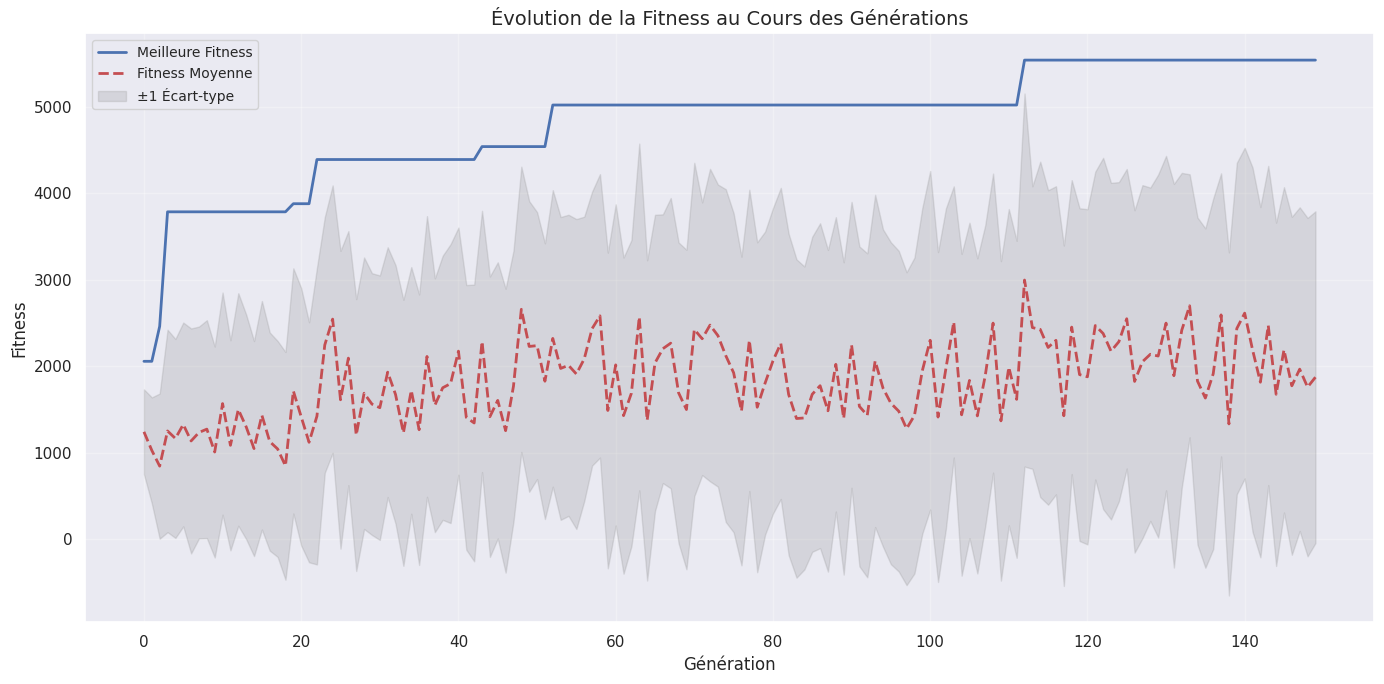

In [4]:
# Plot de l'évolution de la fitness
def plot_fitness_evolution(data):
    generations = range(len(data['best_fitness_per_gen']))

    fig, ax = plt.subplots(figsize=(14, 7))

    # Plot meilleure fitness et moyenne
    ax.plot(generations, data['best_fitness_per_gen'], 'b-', label='Meilleure Fitness', linewidth=2)
    ax.plot(generations, data['avg_fitness_per_gen'], 'r--', label='Fitness Moyenne', linewidth=2)

    # Ajout zone de variance
    fitness_std = [np.std(gen_fitness) for gen_fitness in data['fitness_history']]
    ax.fill_between(generations,
                    np.array(data['avg_fitness_per_gen']) - fitness_std,
                    np.array(data['avg_fitness_per_gen']) + fitness_std,
                    alpha=0.2, color='gray', label='±1 Écart-type')

    ax.set_title('Évolution de la Fitness au Cours des Générations', fontsize=14)
    ax.set_xlabel('Génération', fontsize=12)
    ax.set_ylabel('Fitness', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=10)

    plt.tight_layout()
    plt.show()

plot_fitness_evolution(training_data)

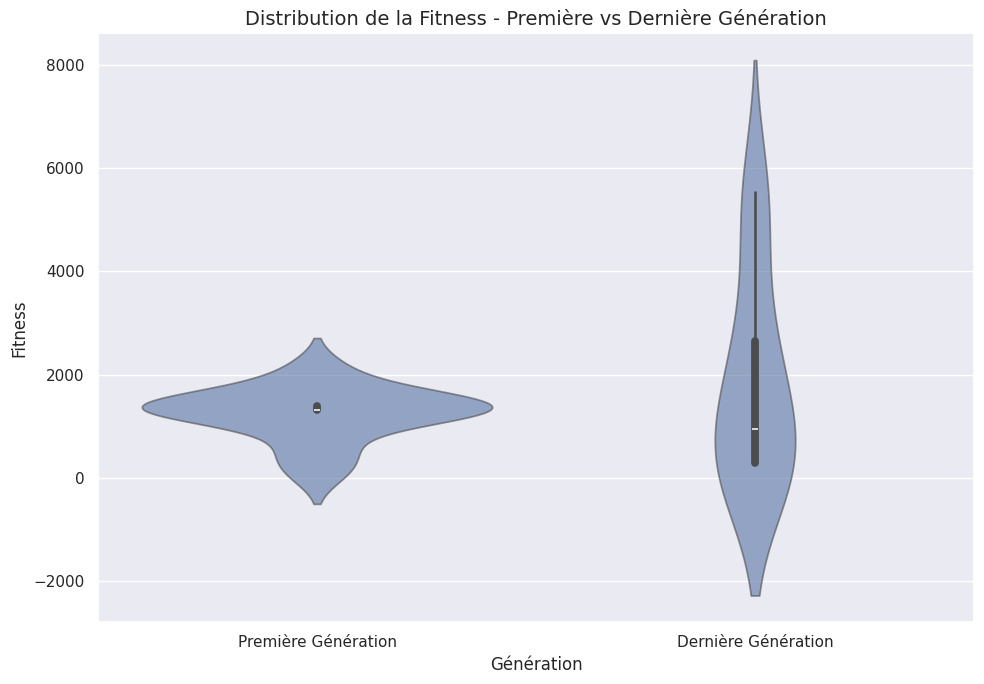

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_fitness_distribution(data):
    # Sélectionner la première et la dernière génération
    first_gen = data['fitness_history'][0]
    last_gen = data['fitness_history'][-1]

    # Créer un DataFrame avec ces deux générations
    generations = ['Première Génération'] * len(first_gen) + ['Dernière Génération'] * len(last_gen)
    fitness_values = first_gen + last_gen

    df = pd.DataFrame({
        'Génération': generations,
        'Fitness': fitness_values
    })

    # Plot violin
    plt.figure(figsize=(10, 7))
    sns.violinplot(data=df, x='Génération', y='Fitness',
                   alpha=0.6, inner='box')

    plt.title('Distribution de la Fitness - Première vs Dernière Génération', fontsize=14)
    plt.xlabel('Génération', fontsize=12)
    plt.ylabel('Fitness', fontsize=12)

    # Affichage du graphique
    plt.tight_layout()
    plt.show()

# Exemple d'appel de fonction
subset_data = {'fitness_history': training_data['fitness_history']}
plot_fitness_distribution(subset_data)


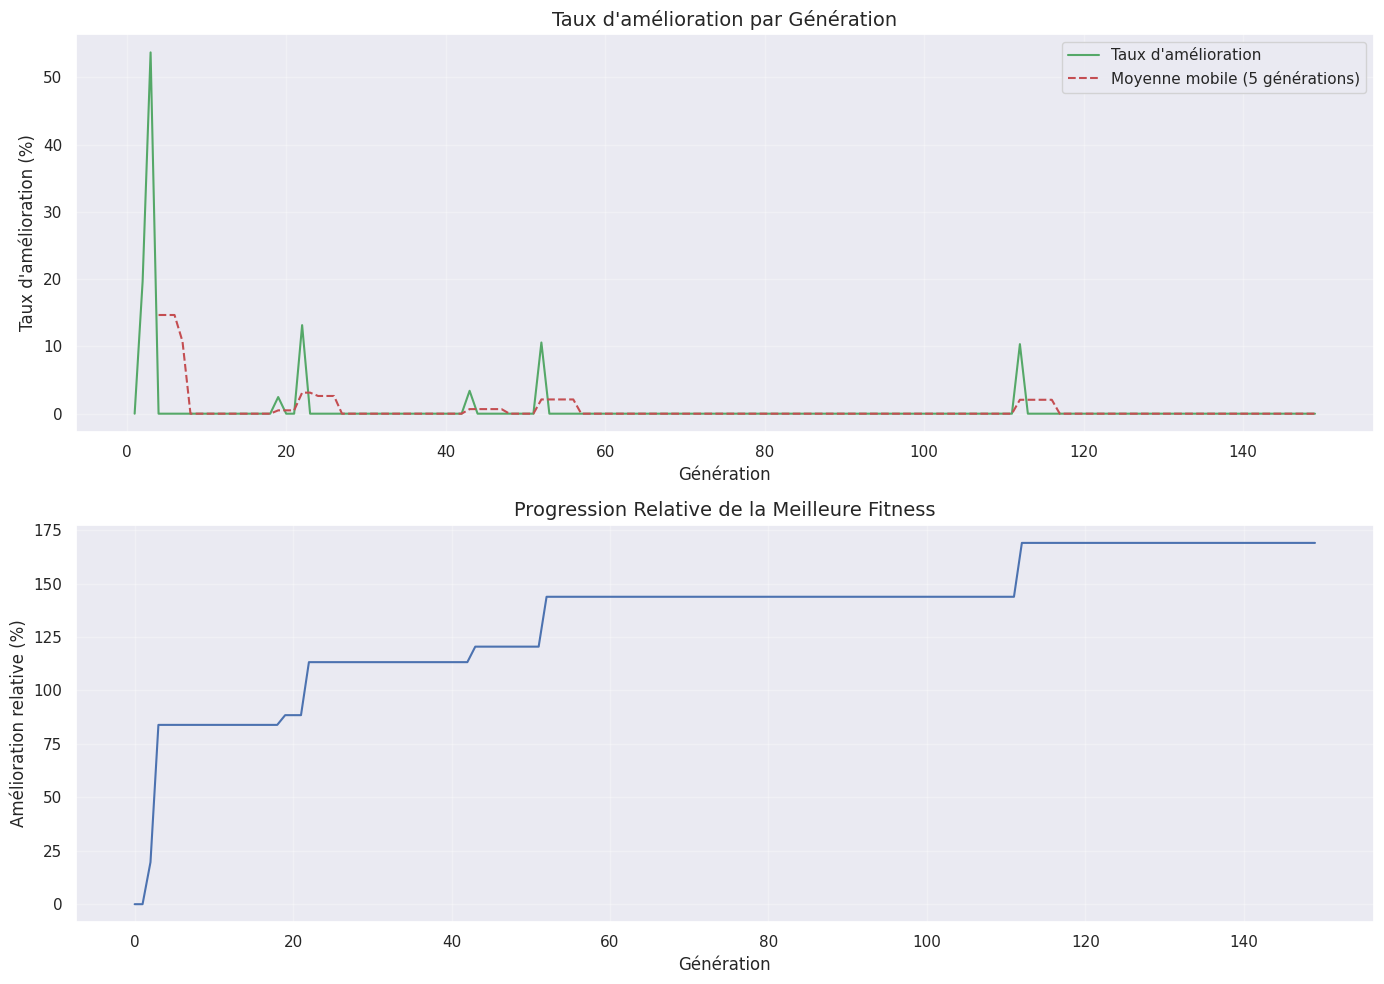

In [6]:
# Analyse de convergence
def plot_convergence_analysis(data):
    generations = range(len(data['best_fitness_per_gen']))
    best_fitness = data['best_fitness_per_gen']

    # Calcul du taux d'amélioration
    improvement_rate = [0]
    for i in range(1, len(best_fitness)):
        improvement = (best_fitness[i] - best_fitness[i-1]) / best_fitness[i-1] * 100
        improvement_rate.append(improvement)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

    # Plot du taux d'amélioration
    ax1.plot(generations[1:], improvement_rate[1:], 'g-', label='Taux d\'amélioration')
    ax1.set_title('Taux d\'amélioration par Génération', fontsize=14)
    ax1.set_xlabel('Génération', fontsize=12)
    ax1.set_ylabel('Taux d\'amélioration (%)', fontsize=12)
    ax1.grid(True, alpha=0.3)

    # Plot de la moyenne mobile du taux d'amélioration
    window = 5
    rolling_mean = pd.Series(improvement_rate).rolling(window=window).mean()
    ax1.plot(generations, rolling_mean, 'r--',
             label=f'Moyenne mobile ({window} générations)')
    ax1.legend()

    # Plot de la progression relative
    relative_progress = [(f - best_fitness[0]) / best_fitness[0] * 100
                        for f in best_fitness]
    ax2.plot(generations, relative_progress, 'b-', label='Progression relative')
    ax2.set_title('Progression Relative de la Meilleure Fitness', fontsize=14)
    ax2.set_xlabel('Génération', fontsize=12)
    ax2.set_ylabel('Amélioration relative (%)', fontsize=12)
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_convergence_analysis(training_data)

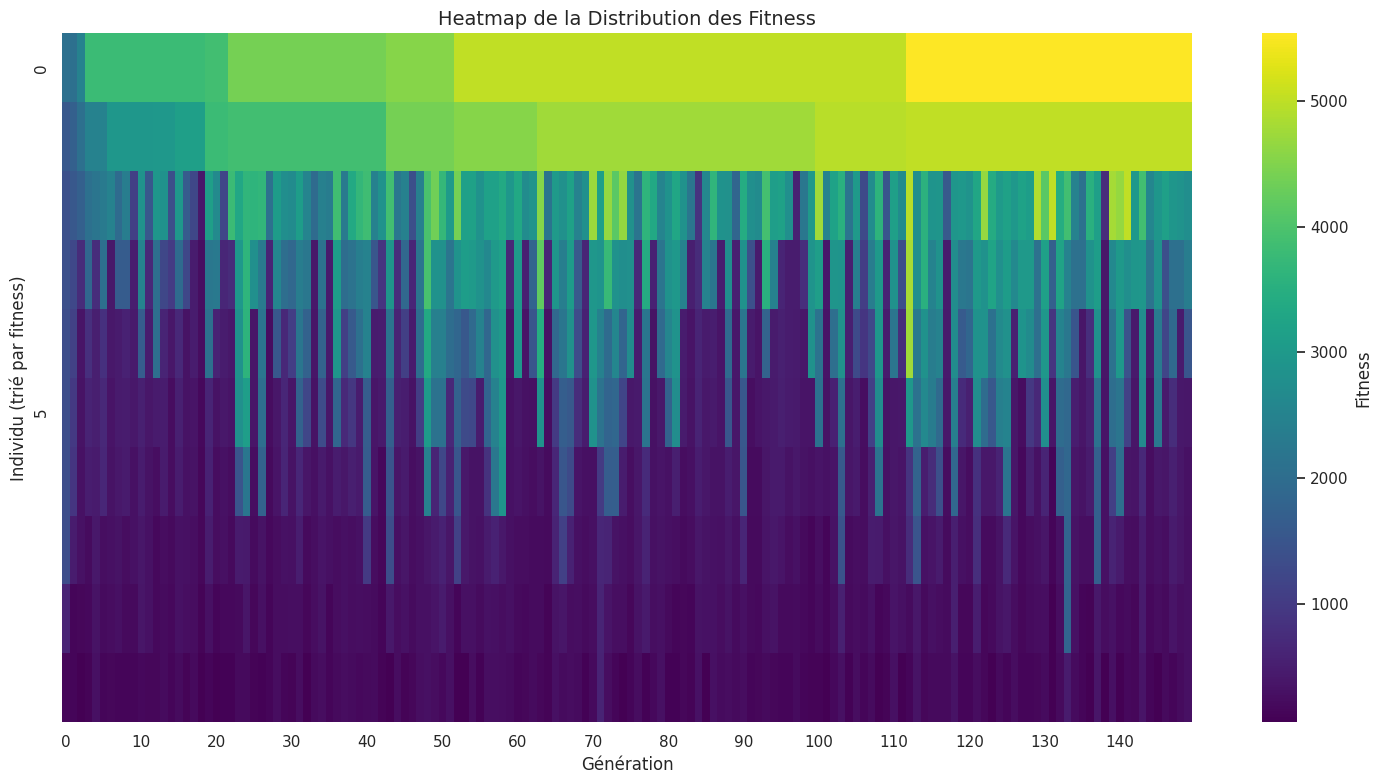

In [7]:
# Heatmap de diversité
def plot_diversity_heatmap(data):
    # Calculer la matrice de diversité
    pop_size = len(data['fitness_history'][0])
    num_generations = len(data['fitness_history'])
    diversity_matrix = np.zeros((num_generations, pop_size))

    for gen, fitness_list in enumerate(data['fitness_history']):
        sorted_fitness = sorted(fitness_list, reverse=True)
        diversity_matrix[gen] = sorted_fitness

    plt.figure(figsize=(15, 8))

    # Créer le heatmap et garder la référence pour la colorbar
    heatmap = sns.heatmap(diversity_matrix.T,
                         cmap='viridis',
                         xticklabels=10,
                         yticklabels=5,
                         cbar_kws={'label': 'Fitness'})  # Ajouter le label directement dans cbar_kws

    plt.title('Heatmap de la Distribution des Fitness', fontsize=14)
    plt.xlabel('Génération', fontsize=12)
    plt.ylabel('Individu (trié par fitness)', fontsize=12)

    plt.tight_layout()
    plt.show()

plot_diversity_heatmap(training_data)

In [8]:
# Statistiques de convergence
def print_convergence_stats(data):
    best_fitness = data['best_fitness_per_gen']
    avg_fitness = data['avg_fitness_per_gen']

    # Calculer les statistiques
    final_best = best_fitness[-1]
    final_avg = avg_fitness[-1]
    best_gen = np.argmax(best_fitness)

    # Calculer le temps de convergence (quand on atteint 90% du max)
    threshold = 0.9 * max(best_fitness)
    convergence_gen = next(
        (i for i, f in enumerate(best_fitness) if f >= threshold),
        len(best_fitness)
    )

    print("Statistiques de convergence:")
    print(f"Meilleure fitness finale: {final_best:.2f}")
    print(f"Fitness moyenne finale: {final_avg:.2f}")
    print(f"Génération de la meilleure fitness: {best_gen}")
    print(f"Génération de convergence (90%): {convergence_gen}")
    print(f"Amélioration totale: {((final_best/best_fitness[0])-1)*100:.2f}%")

print_convergence_stats(training_data)

Statistiques de convergence:
Meilleure fitness finale: 5539.51
Fitness moyenne finale: 1875.13
Génération de la meilleure fitness: 112
Génération de convergence (90%): 52
Amélioration totale: 169.04%
